In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [0]:
embedding_size = 300
vocab_size = 8256
max_len = 40

In [19]:
image_input = keras.Input(shape = (2048,))
x = layers.Dense(embedding_size, activation='relu')(image_input)
image_output = layers.RepeatVector(max_len)(x)
image_model = keras.Model(inputs=image_input,outputs = image_output)
image_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2048)]            0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               614700    
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 40, 300)           0         
Total params: 614,700
Trainable params: 614,700
Non-trainable params: 0
_________________________________________________________________


In [20]:
caption_input = keras.Input(shape = (max_len,))
y = layers.Embedding(vocab_size,embedding_size,input_length=max_len)(caption_input)
y = layers.LSTM(256,return_sequences=True)(y)
caption_output = layers.TimeDistributed(layers.Dense(embedding_size))(y)
caption_model = keras.Model(inputs = caption_input, outputs = caption_output)
caption_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 40)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 40, 300)           2476800   
_________________________________________________________________
lstm_3 (LSTM)                (None, 40, 256)           570368    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 300)           77100     
Total params: 3,124,268
Trainable params: 3,124,268
Non-trainable params: 0
_________________________________________________________________


In [28]:
conca = layers.Concatenate()([image_model.output,caption_model.output])
z = layers.Bidirectional(layers.LSTM(256, input_shape = (max_len,300), return_sequences=False))(conca)
z = layers.Dense(vocab_size)(z)
final_output = layers.Activation('softmax')(z)
final_model = keras.Model(inputs = [image_model.input,caption_model.input], outputs = final_output)
final_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 40, 300)      2476800     input_14[0][0]                   
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 300)          614700      input_13[0][0]                   
___________________________________________________________________________________________

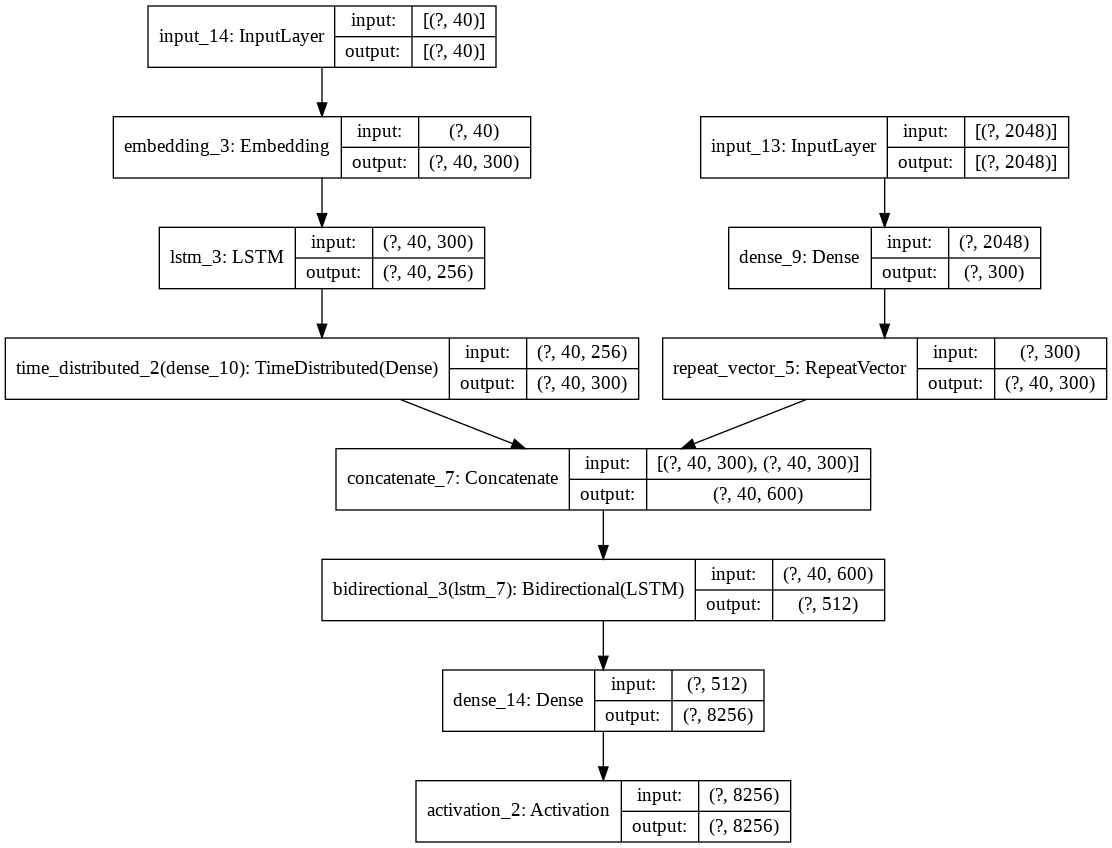

In [34]:
tf.keras.utils.plot_model(final_model,show_layer_names=True, show_shapes = True)